In [1]:
#dependencies
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
import requests
import numpy as np

#import api key from config file
from config import api_key

output_data_file = 'Output_Images/cities.csv'

In [3]:
#range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)


In [4]:
#list for holding lat_lngs and cities
lat_lngs = []
cities = []

#create a set of random lat and lng cominations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [5]:
#identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        
    #if the city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)

#print city count to confirm sufficient count
print(len(cities))

628


In [6]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'Imperial'
weather_data = []
count = 1

In [7]:
#loop through cities to get needed info
for city in cities:
    
    #print statement regarding record processing
    print(f'Processing record number {count} | {city}')
    
    #API request
    response = requests.get(f'{url}q={city}&units={units}&APPID={api_key}').json()
    
    try:
        temp = response['main']['temp']
        humid = response['main']['humidity']
        cloud = response['clouds']['all']
        ws = response['wind']['speed']
        lat = response['coord']['lat']
        country = response['sys']['country']
        
        #append lists if data available
        weather_data.append([count, city, country, lat, temp, humid, cloud, ws])
        
        #increase count
        count += 1
    
    except:
        continue

Processing record number 1 | pevek
Processing record number 2 | khonuu
Processing record number 2 | qaanaaq
Processing record number 3 | ibia
Processing record number 4 | coolum beach
Processing record number 5 | mataura
Processing record number 6 | miles city
Processing record number 7 | maniitsoq
Processing record number 8 | illoqqortoormiut
Processing record number 8 | saint-philippe
Processing record number 9 | pisco
Processing record number 10 | mayo
Processing record number 11 | rikitea
Processing record number 12 | kodiak
Processing record number 13 | batamshinskiy
Processing record number 14 | nizhniy ingash
Processing record number 15 | progreso
Processing record number 16 | deputatskiy
Processing record number 17 | garcia hernandez
Processing record number 18 | chalon-sur-saone
Processing record number 19 | constitucion
Processing record number 20 | marcona
Processing record number 20 | new norfolk
Processing record number 21 | saint-pierre
Processing record number 22 | nichi

Processing record number 183 | waipawa
Processing record number 184 | saldanha
Processing record number 185 | sur
Processing record number 186 | portland
Processing record number 187 | pradera
Processing record number 188 | barentsburg
Processing record number 188 | attawapiskat
Processing record number 188 | isla vista
Processing record number 189 | marsh harbour
Processing record number 190 | ugoofaaru
Processing record number 191 | lebu
Processing record number 192 | benevento
Processing record number 193 | nachalovo
Processing record number 194 | jibuti
Processing record number 194 | san blas
Processing record number 195 | dakar
Processing record number 196 | tabory
Processing record number 197 | kristiinankaupunki
Processing record number 197 | mazatlan
Processing record number 198 | buqayq
Processing record number 198 | baie-comeau
Processing record number 199 | pangnirtung
Processing record number 200 | tonj
Processing record number 200 | natchitoches
Processing record number 20

Processing record number 364 | verkhovazhye
Processing record number 365 | lompoc
Processing record number 366 | kutum
Processing record number 367 | port macquarie
Processing record number 368 | henties bay
Processing record number 369 | ibipeba
Processing record number 370 | kongolo
Processing record number 371 | shunyi
Processing record number 372 | half moon bay
Processing record number 373 | manzanillo
Processing record number 374 | la ronge
Processing record number 375 | mahebourg
Processing record number 376 | tiquisio
Processing record number 377 | umm jarr
Processing record number 377 | manama
Processing record number 378 | marawi
Processing record number 379 | behat
Processing record number 380 | evensk
Processing record number 381 | meulaboh
Processing record number 382 | alekseyevka
Processing record number 383 | dongsheng
Processing record number 384 | nong phai
Processing record number 385 | alofi
Processing record number 386 | dingle
Processing record number 387 | ballin

Processing record number 549 | wajima
Processing record number 550 | savannah bight
Processing record number 551 | nemuro
Processing record number 552 | mecca
Processing record number 553 | panaba
Processing record number 554 | ranfurly
Processing record number 555 | tabiauea
Processing record number 555 | the valley
Processing record number 556 | melekhovskaya
Processing record number 556 | maceio
Processing record number 557 | shemgang
Processing record number 558 | ronse
Processing record number 559 | roma
Processing record number 560 | bhachau


In [8]:
weather_df = pd.DataFrame(weather_data, columns=['Count', 'City', 'Country', 'Lat', 'Temp', 'Humidity', 'Cloudiness', 'Wind Speed'])
weather_df.head()

,Count,City,Country,Lat,Temp,Humidity,Cloudiness,Wind Speed
0,1,pevek,RU,69.70,39.80,100,88,7.29
1,2,qaanaaq,GL,77.48,18.56,100,0,11.54
2,3,ibia,NG,5.18,79.22,85,68,7.63
3,4,coolum beach,AU,-26.53,58.52,100,0,2.93
4,5,mataura,NZ,-46.19,51.50,63,56,21.72


In [9]:
#output dataframe to csv
weather_df.to_csv(output_data_file)

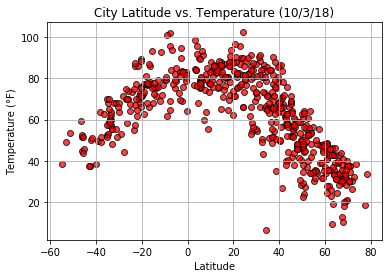

In [10]:
#create scatter for lat & temp
fig_scatter = plt.scatter(weather_df['Lat'], weather_df['Temp'], marker='o',
            facecolor='red', edgecolor='black', alpha=0.75)

plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Temperature (°F)')
plt.title('City Latitude vs. Temperature (10/3/18)')
plt.savefig('Output_Images/latitude_temp.png')

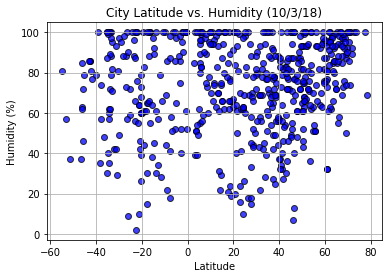

In [11]:
#create scatter for lat & humidity
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker='o',
            facecolor='blue', edgecolor='black', alpha=0.75)

plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (10/3/18)')
plt.savefig('Output_Images/latitude_humidity.png')

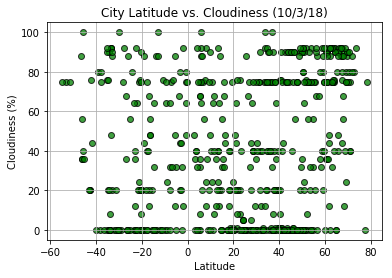

In [12]:
#create scatter for lat & cloudiness
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker='o',
            facecolor='green', edgecolor='black', alpha=0.75)

plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (10/3/18)')
plt.savefig('Output_Images/latitude_cloudiness.png')

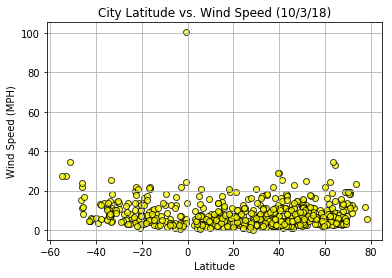

In [13]:
#create scatter for lat & wind speed
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker='o',
            facecolor='yellow', edgecolor='black', alpha=0.75)

plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('City Latitude vs. Wind Speed (10/3/18)')
plt.savefig('Output_Images/latitude_wind_speed.png')